In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import torch

from ballchallenge.accelerometer_dataset import AccelerometerDatasetWithPointLabels

DATASET_ROOT = Path("../data")
SAMPLING_FREQ = 400

In [3]:

dataset = AccelerometerDatasetWithPointLabels(DATASET_ROOT)
samples, labels = dataset[:]


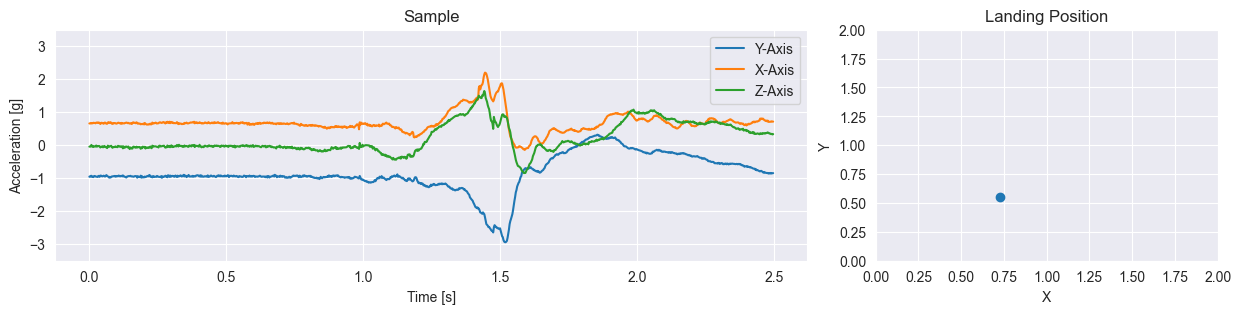

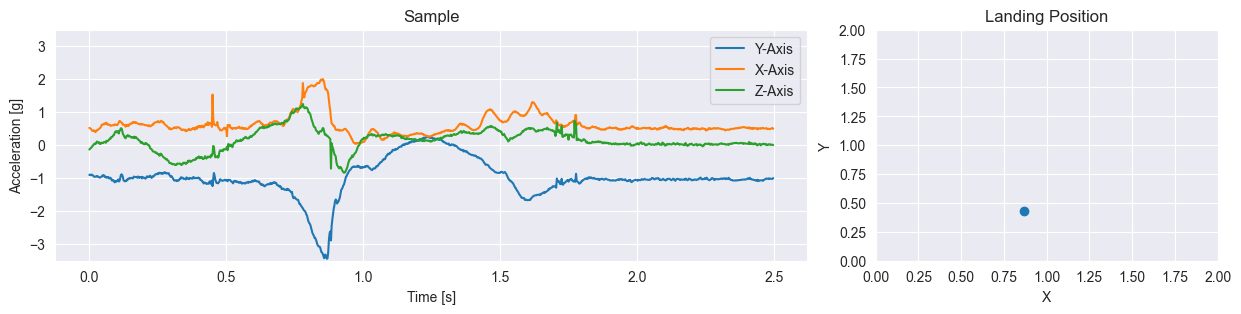

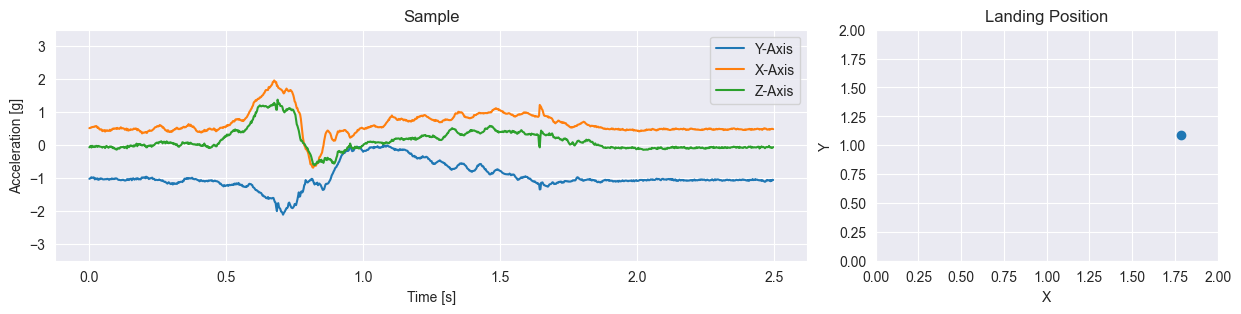

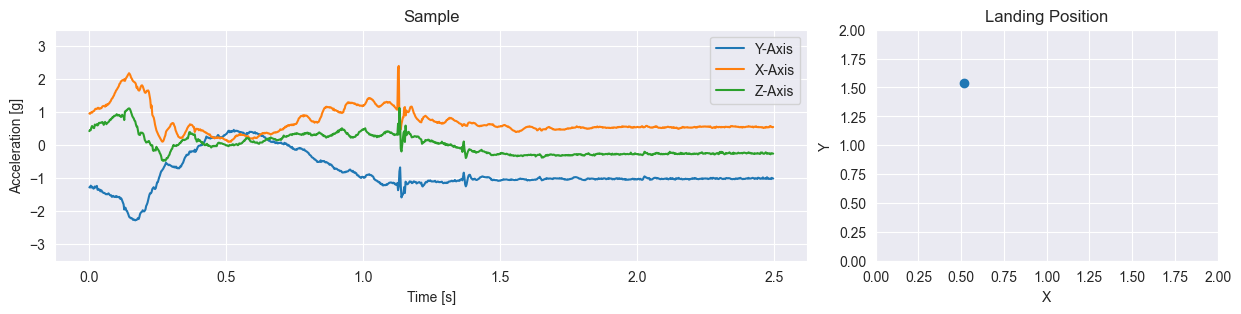

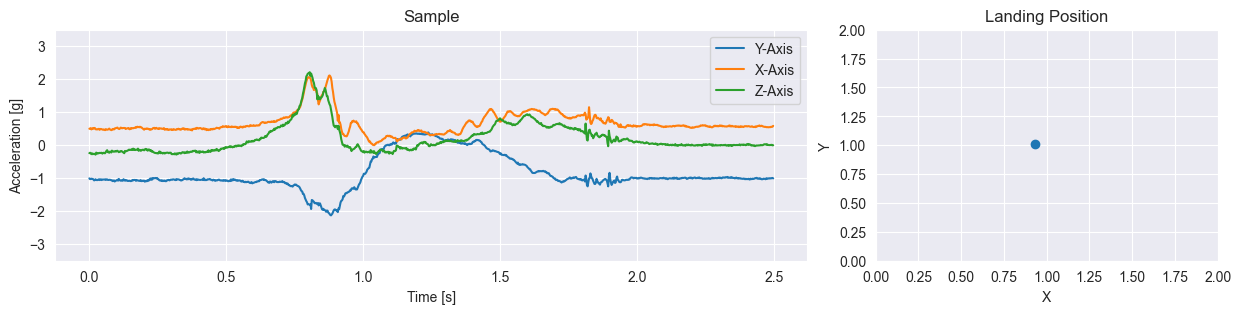

In [4]:
def plot_sample_with_label(idx: int) -> None:
    def plot_sample(ax):
        seconds = torch.arange(samples.shape[2]) / SAMPLING_FREQ
        ax.plot(seconds, samples[idx, 1], label="Y-Axis")
        ax.plot(seconds, samples[idx, 0], label="X-Axis")
        ax.plot(seconds, samples[idx, 2], label="Z-Axis")
        ax.legend(loc="upper right")
        ax.set_ylim(-3.5, 3.5)
        ax.set_xlabel("Time [s]")
        ax.set_ylabel("Acceleration [g]")
        ax.set_title("Sample")

    def plot_label(ax):
        x = labels[idx][0].item()
        y = labels[idx][1].item()
        ax.set_ylim(0, 2)
        ax.set_xlim(0, 2)
        ax.scatter([x], [y])
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_title("Landing Position")

    _, axs = plt.subplot_mosaic([["sample", "sample", "label"]], figsize=(15, 3))
    plot_sample(axs["sample"])
    plot_label(axs["label"])

for i in range(min(5,len(samples))):
    plot_sample_with_label(i)
    plt.savefig(f"{i}.png")
